<a href="https://colab.research.google.com/github/zcrennen/realEstatePricePrediction/blob/main/realEstatePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

The goal of this notebook is to create a model to predict the prices of houses.

Let's start by importing our dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's load in our data and take a look

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Looks good. Except ocean_proximity is a string, not a number. We'll take care of this later. Let's check if we have any null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Looks pretty good. Except, there are some null values in the total_bedrooms column. Since there aren't that many, let's just drop these values

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Now that we don't have any null data, let's do a train test split. This is splitting the data into a training partition and a testing partition, and separating the X values from the y values

In [7]:
from sklearn.model_selection import train_test_split

#Initialize X and y
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']
print(X.head())
print(y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Let's rejoin the training data so we can do some more exploration

In [9]:
train_df = X_train.join(y_train)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12457,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,INLAND,74000.0
5312,-118.43,34.05,22.0,4251.0,1073.0,1581.0,881.0,5.2555,<1H OCEAN,500001.0
17079,-122.19,37.48,45.0,886.0,165.0,492.0,173.0,4.2708,NEAR BAY,267000.0
18112,-122.03,37.30,22.0,3583.0,758.0,1792.0,695.0,5.4842,<1H OCEAN,335300.0
20442,-118.78,34.25,13.0,1841.0,237.0,833.0,231.0,7.7785,<1H OCEAN,404700.0
...,...,...,...,...,...,...,...,...,...,...
8073,-118.18,33.83,52.0,2569.0,484.0,1030.0,451.0,4.1301,NEAR OCEAN,268400.0
1652,-121.97,37.93,4.0,3241.0,464.0,1552.0,494.0,6.6134,INLAND,307000.0
2063,-119.73,36.59,31.0,1551.0,296.0,1058.0,287.0,3.3438,INLAND,92600.0
6609,-118.15,34.19,38.0,1750.0,411.0,1398.0,409.0,2.3967,<1H OCEAN,163100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

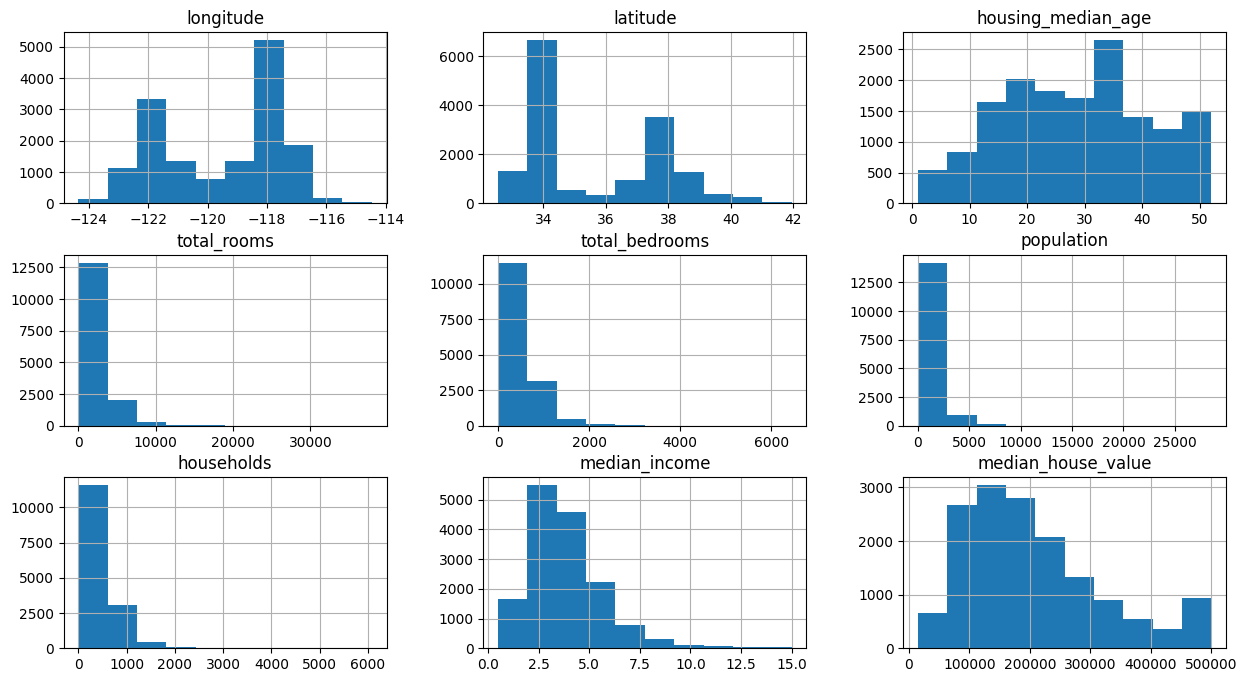

In [10]:
train_df.hist(figsize=(15,8))

Let's look at the correlations between different variables.

<ipython-input-11-50e11ca55744>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

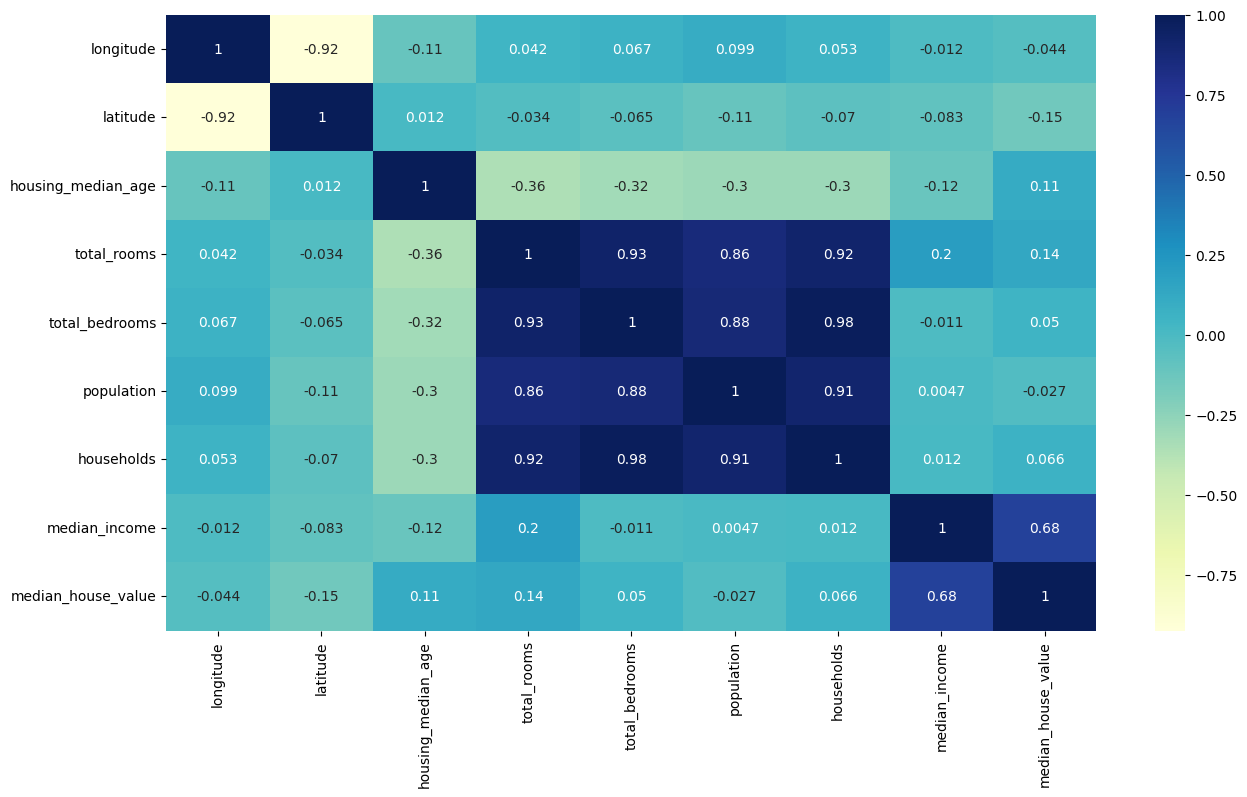

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

Since we are predicting house prices, we want to look at variables that are associated with our target, median_house_value. It looks like most variables have a fairly weak correlation, except for median_income. Let's keep this in mind for later

In the histograms, it looks like we have some skewed columns. Mainly total_rooms, total_bedrooms, population, and households look skewed. Let's use to log of these data to normalize them.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

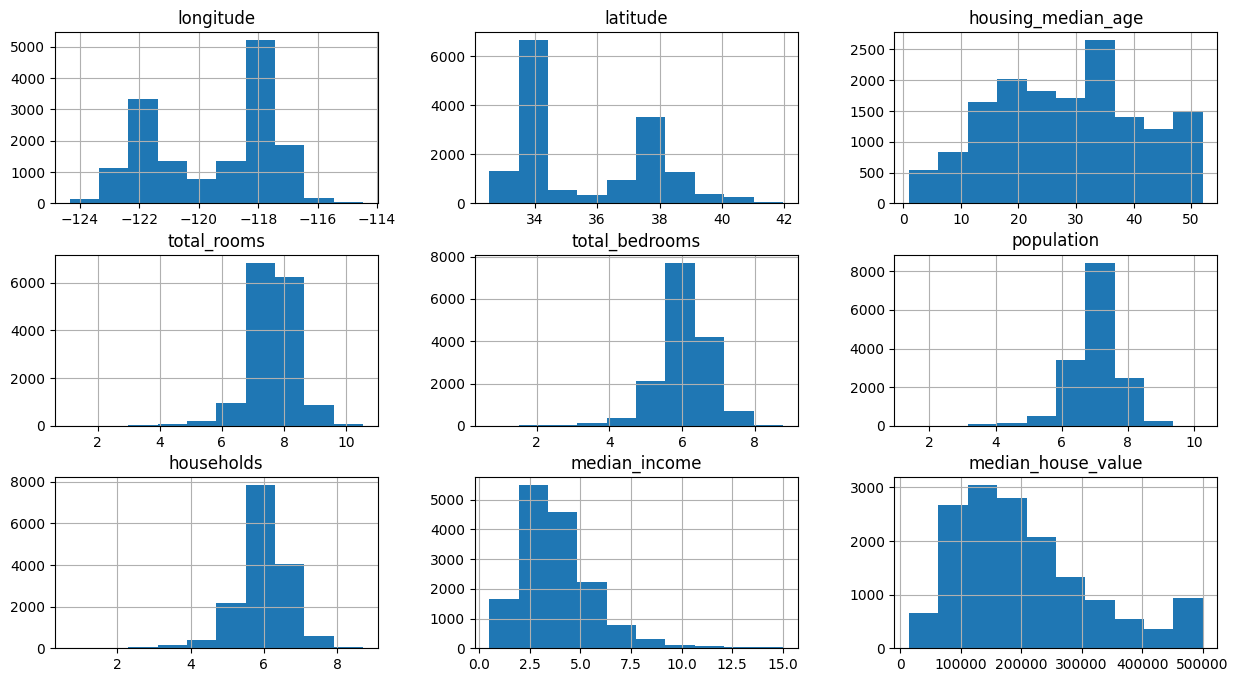

In [12]:
#Resetting train_df
train_df = X_train.join(y_train)
# Using a + 1 for each log to avoid 0 values
train_df['total_rooms'] = np.log(train_df['total_rooms'] + 1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms'] + 1)
train_df['population'] = np.log(train_df['population'] + 1)
train_df['households'] = np.log(train_df['households'] + 1)

train_df.hist(figsize=(15,8))

Remember the ocean_proximity column? Let's factor that into our data. We need to turn the string into numerical values. Let's look at all the different types of ocean_proximity

In [13]:
train_df.ocean_proximity.value_counts()

<1H OCEAN     6762
INLAND        4882
NEAR OCEAN    1958
NEAR BAY      1719
ISLAND           3
Name: ocean_proximity, dtype: int64

To turn this into numbers, we can use get_dummies. This will make a binary column for each of the 5 categories. We also need to remember to get rid of the old ocean_proximity column

In [14]:
train_df = train_df.join(pd.get_dummies(train_df.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [15]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12457,-114.58,33.63,29.0,7.235619,5.468060,6.510258,5.480639,3.3438,74000.0,0,1,0,0,0
5312,-118.43,34.05,22.0,8.355145,6.979145,7.366445,6.782192,5.2555,500001.0,1,0,0,0,0
17079,-122.19,37.48,45.0,6.787845,5.111988,6.200509,5.159055,4.2708,267000.0,0,0,0,1,0
18112,-122.03,37.30,22.0,8.184235,6.632002,7.491645,6.545350,5.4842,335300.0,1,0,0,0,0
20442,-118.78,34.25,13.0,7.518607,5.472271,6.726233,5.446737,7.7785,404700.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,-118.18,33.83,52.0,7.851661,6.184149,6.938284,6.113682,4.1301,268400.0,0,0,0,0,1
1652,-121.97,37.93,4.0,8.083946,6.142037,7.347944,6.204558,6.6134,307000.0,0,1,0,0,0
2063,-119.73,36.59,31.0,7.347300,5.693732,6.965080,5.662960,3.3438,92600.0,0,1,0,0,0
6609,-118.15,34.19,38.0,7.467942,6.021023,7.243513,6.016157,2.3967,163100.0,1,0,0,0,0


Let's take a look at our correlations again with the new columns.

<Axes: >

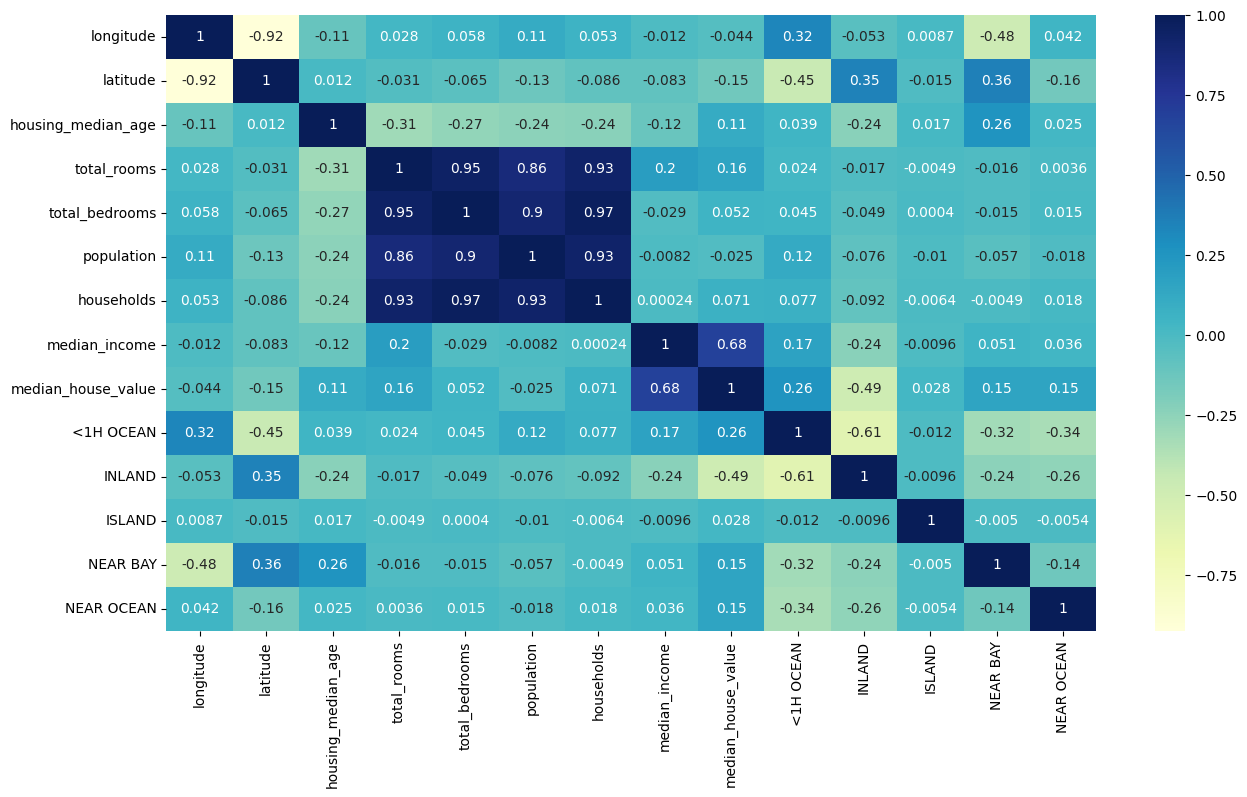

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

We can see that INLAND has a negative correlation with home value. Meaning that cheaper homes will be inland. Homes >1 hour from the ocean have a positive correlation. Let's make another visualization to see how lattitude and longitude affect price.

<Axes: xlabel='latitude', ylabel='longitude'>

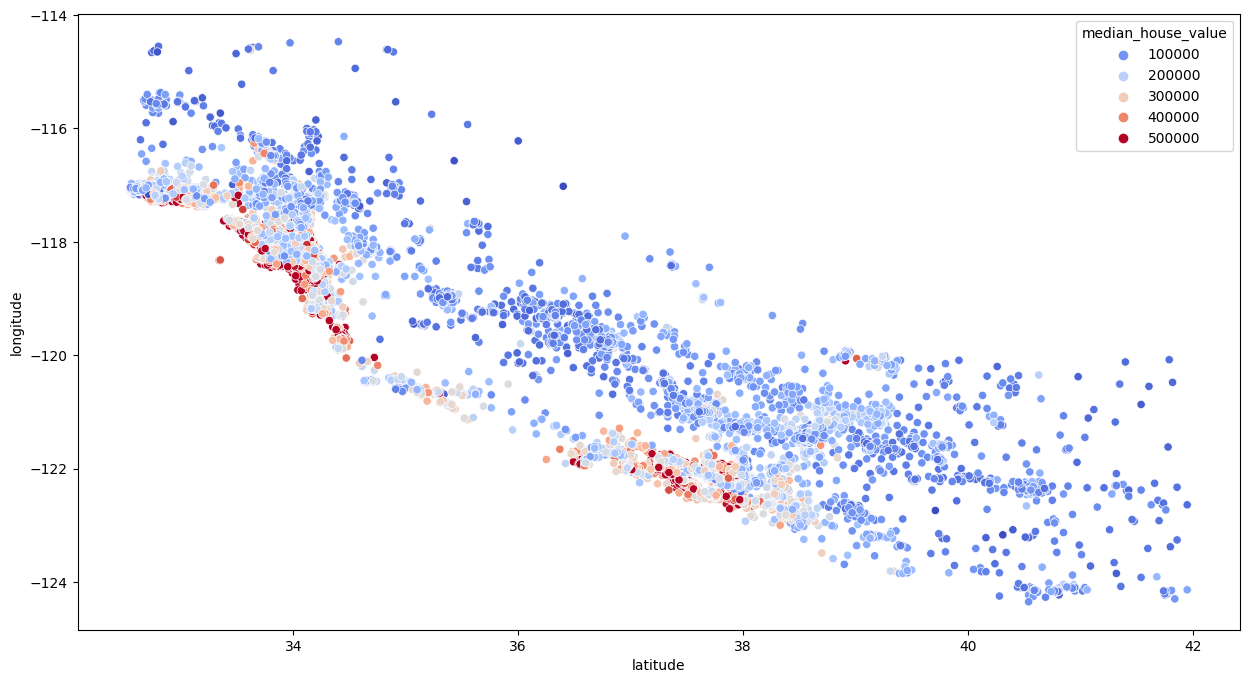

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_df, hue='median_house_value', palette='coolwarm')

Although not a perfect geographical representation of the California coastline, we can see that houses near the coast are generally more expensive.

Maybe it would be important to see how many of our rooms are bedrooms? Also, maybe these are multi family households. Let's look at how many rooms are in each household. To do this, we will make some derived attributes.

In [18]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms'] / train_df['households']

<Axes: >

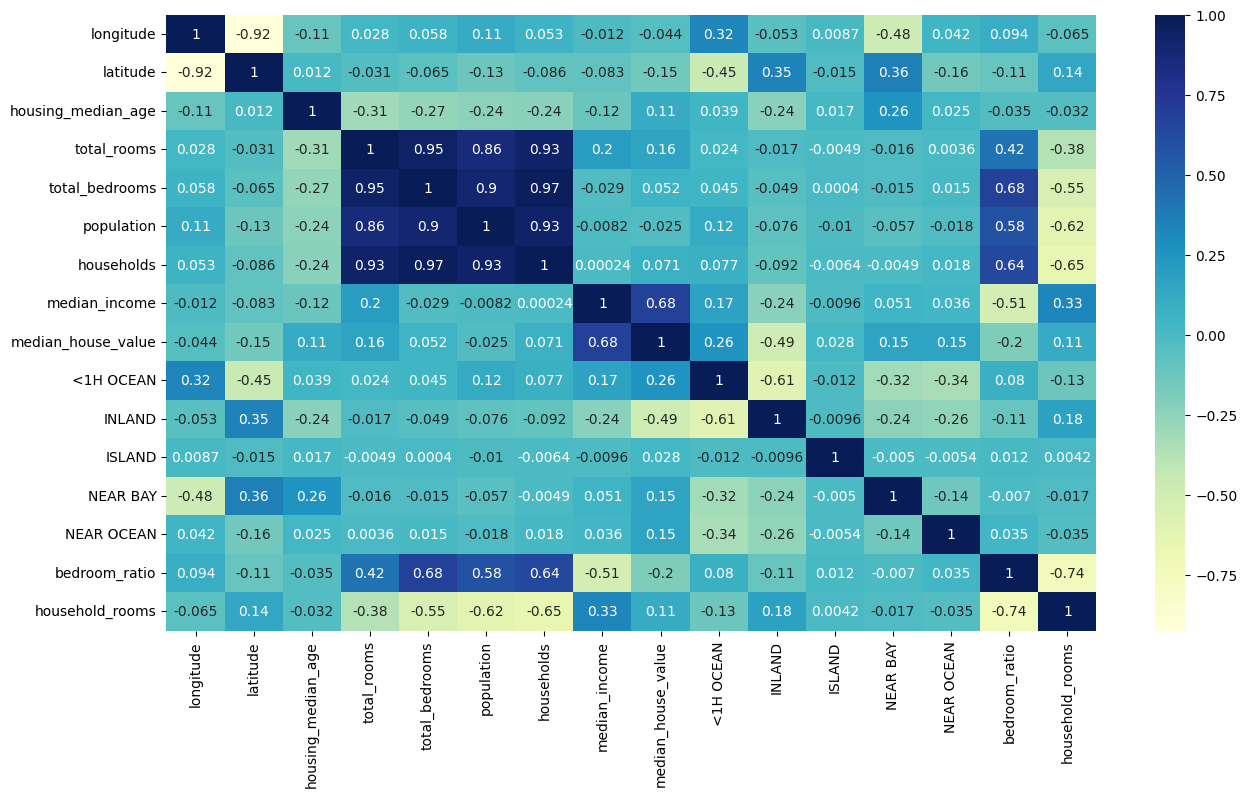

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

Looks like the bedroom ratio and household_rooms do have an effect

Let's try a couple different models on this data. We'll start with a simple linear regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#Scaling the data
scaler = StandardScaler()
#Split the data again
X_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df['median_house_value']
#Only need to scale input, not output
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

We need to apply all of our data cleaning and exploration steps to our testing dataset as well

In [21]:
test_df = X_test.join(y_test)

test_df['total_rooms'] = np.log(test_df['total_rooms'] + 1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms'] + 1)
test_df['population'] = np.log(test_df['population'] + 1)
test_df['households'] = np.log(test_df['households'] + 1)

test_df = test_df.join(pd.get_dummies(test_df.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms'] / test_df['households']

X_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df['median_house_value']
X_test_s = scaler.fit_transform(X_test)

Let's look at the dataframes once more just to confirm that they have the same columns

In [22]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15002,-117.04,32.74,5.0,7.965198,6.666957,7.454720,6.632002,1.7179,132000.0,0,0,0,0,1,0.837011,1.201025
1871,-119.95,38.94,24.0,7.687539,6.249975,6.628041,5.411646,2.5875,173400.0,0,1,0,0,0,0.813001,1.420555
5016,-118.33,34.00,47.0,7.421776,5.963579,6.797940,5.762051,2.2054,121500.0,1,0,0,0,0,0.803525,1.288044
9838,-121.91,36.61,30.0,7.921536,6.393591,7.326466,6.318968,3.2952,234600.0,0,0,0,0,1,0.807115,1.253612
14002,-117.10,34.57,6.0,8.539150,6.951772,7.569928,6.586172,3.1917,112800.0,0,1,0,0,0,0.814106,1.296527


In [23]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12457,-114.58,33.63,29.0,7.235619,5.468060,6.510258,5.480639,3.3438,74000.0,0,1,0,0,0,0.755714,1.320215
5312,-118.43,34.05,22.0,8.355145,6.979145,7.366445,6.782192,5.2555,500001.0,1,0,0,0,0,0.835311,1.231924
17079,-122.19,37.48,45.0,6.787845,5.111988,6.200509,5.159055,4.2708,267000.0,0,0,0,1,0,0.753109,1.315715
18112,-122.03,37.30,22.0,8.184235,6.632002,7.491645,6.545350,5.4842,335300.0,1,0,0,0,0,0.810339,1.250389
20442,-118.78,34.25,13.0,7.518607,5.472271,6.726233,5.446737,7.7785,404700.0,1,0,0,0,0,0.727830,1.380387


Now let's check the accuracy of our linear regression model

In [24]:
reg.score(X_test_s,y_test)

0.6896270986391504

Although better than just guessing randomly, we can do better. Let's try a random forest model

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test, y_test)

0.824461127077725

This model works a lot better! Interestingly, scaling the data made it perform slightly worse. Let's implement a grid search, so we can mess with a variety of parameters at the same time|

In [34]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8],

}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
best_forest = grid_search.best_estimator_

In [37]:
best_forest.score(X_test_s, y_test)

0.8041704628760488